## RLC Network Response

In [71]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
%run basic_material

try:
    import lcapy
except ModuleNotFoundError:
    print("Could not find lcapy - installing")
    !sudo apt install texlive-latex-recommended # takes about 30 sec
    !sudo apt-get install texlive-latex-extra --no-install-recommends # 10 sec
    !sudo apt install imagemagick # 10 sec
    !pip install sympy==1.10.1
    !pip install lcapy # takes 5 sec
    !pip install pdflatex # takes about 5 sec
    print("Will need to restart the Kernel")

from lcapy import Circuit, j, omega, s, exp
from lcapy import R, C, L

import numpy as np
from numpy import logspace, exp

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, savefig

%matplotlib inline

Running Python: 3.8.17
Running Sympy: 1.12rc1


<Figure size 1200x750 with 0 Axes>

# Network Example 1

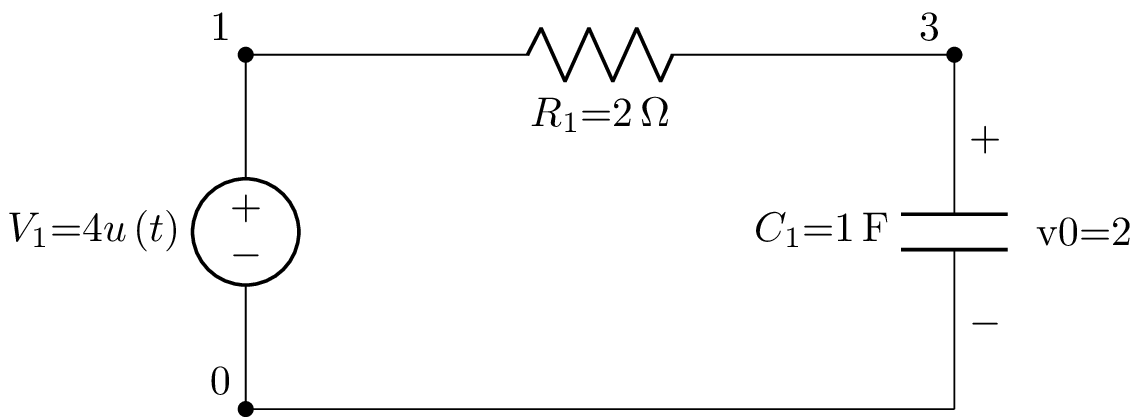

In [95]:
from lcapy import Circuit, s
cct = Circuit("""
V1 1 0 {4*u(t)}; down=1.5
R1 1 3 2; right=3
C1 3 0_3 1 2; down=1.5
W4 0 0_3; right=3
""")
cct.draw()

In [96]:
t = np.linspace(0, 10, 1000)
vc = cct.C1.v.evaluate(t)
ic = cct.C1.i.evaluate(t)
vr = cct.R1.v.evaluate(t)

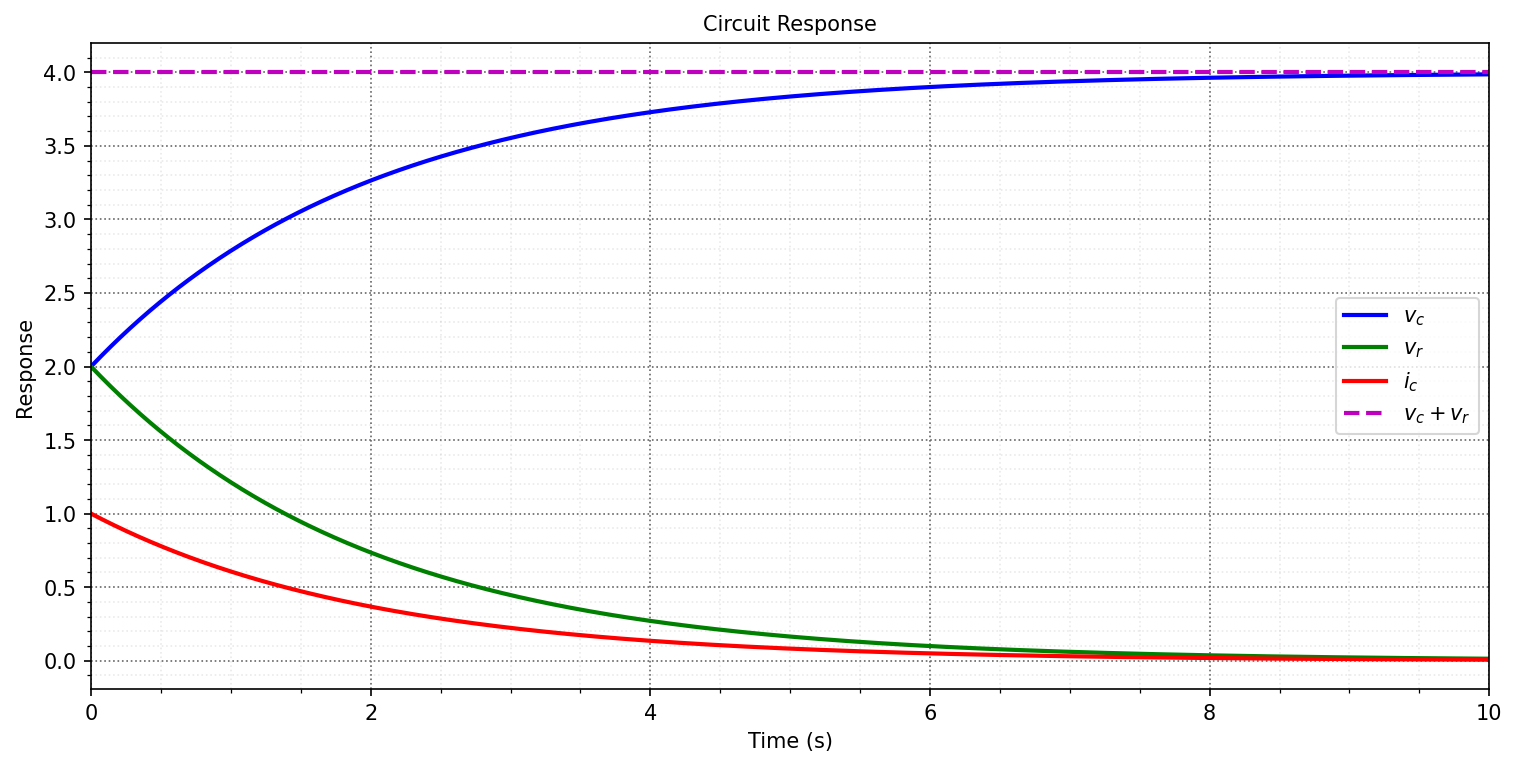

In [101]:
fig = figure(figsize=(10, 5),dpi=150,constrained_layout = True)
ax = fig.add_subplot(111, title='Circuit Response')
ax.plot(t, vc, linewidth=2, color='blue', label='$v_c$')
ax.plot(t, vr, linewidth=2, color='green', label='$v_r$')
ax.plot(t, ic, linewidth=2, color='red', label='$i_c$')
ax.plot(t, vc+vr, 'm--', label='$v_c+v_r$')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Response');
nicegrid(ax)
plt.legend()
savefig('circuit-VRC0.png')
plt.show()

# Network Example 2

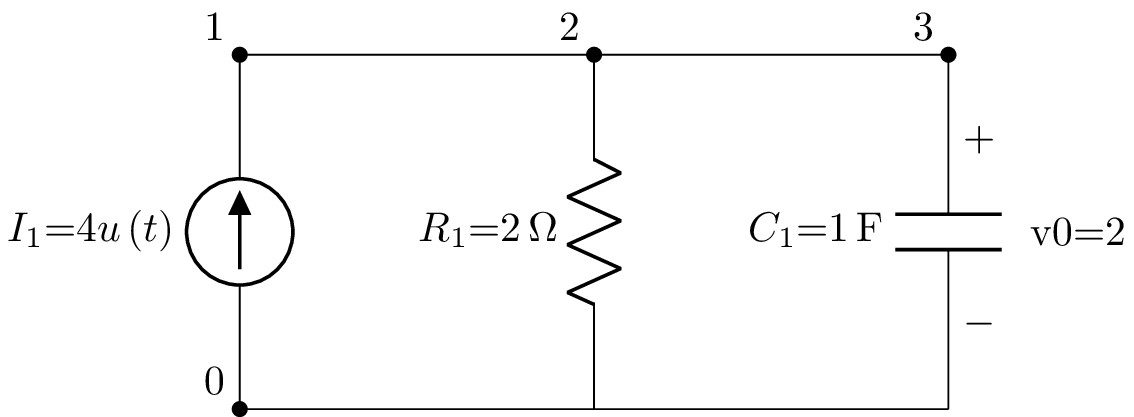

In [91]:
from lcapy import Circuit, s
cct = Circuit("""
I1 1 0 {4*u(t)}; down=1.5
W1 1 2; right=1.5
R1 2 0_2 2; down=1.5
W2 2 3; right=1.5
C1 3 0_3 1 2; down=1.5
W3 0 0_2; right=1.5
W4 0_2 0_3; right=1.5
""")
cct.draw()

In [92]:
t = np.linspace(0, 10, 1000)
vc = cct.C1.v.evaluate(t)
ic = cct.C1.i.evaluate(t)
ir = cct.R1.i.evaluate(t)

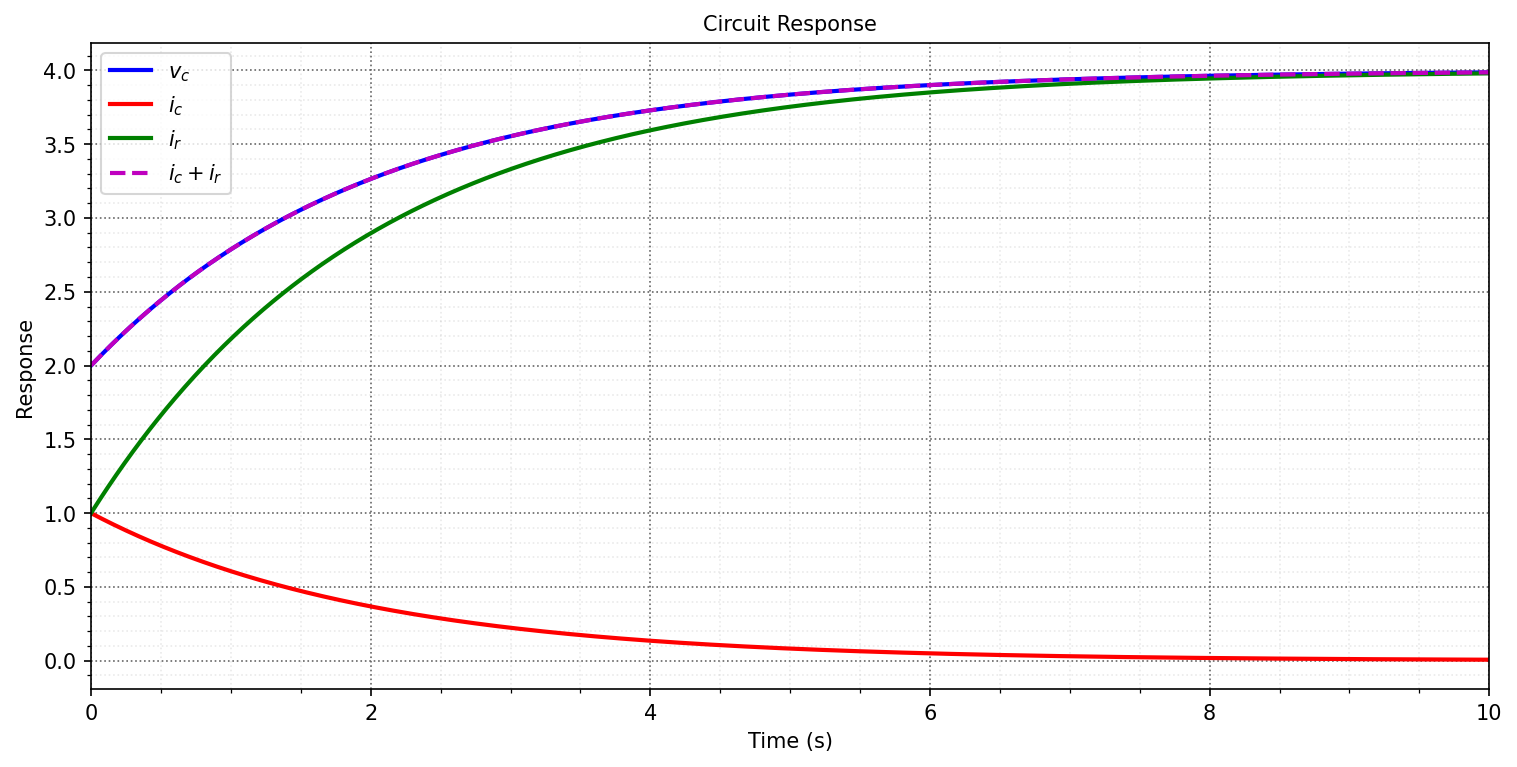

In [100]:
fig = figure(figsize=(10, 5),dpi=150,constrained_layout = True)
ax = fig.add_subplot(111, title='Circuit Response')
ax.plot(t, vc, linewidth=2, color='blue', label='$v_c$')
ax.plot(t, ic, linewidth=2, color='red', label='$i_c$')
ax.plot(t, ir, linewidth=2, color='green', label='$i_r$')
ax.plot(t, ic+ir, 'm--', label='$i_c+i_r$')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Response');
nicegrid(ax)
plt.legend()
savefig('circuit-VRC1.png')
plt.show()